In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
sns.set()

In [6]:
months=['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09',
        '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
        '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
        '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
        '2018-10', '2018-11', '2018-12']

In [36]:
df1 = pd.read_csv("./data/reddit/cm/asktrp_comments.csv")

In [37]:
df2 = pd.read_csv("./data/reddit/cm/TheRedPill_comments.csv")

### Modeling the DataFrames for the Analysis

In [7]:
def complement_df(df, reddit, timeline=months):
    df = pd.DataFrame(df[["Author", "Publish Date"]])
    df["reddit"] = reddit
    df = df[df.Author != "[deleted]"]
    df['time'] = [str(item)[:len(timeline[0])] for item in df["Publish Date"]]
    
    return df

In [39]:
df1 = complement_df(df1, 'asktrp')
df2 = complement_df(df2, 'TheRedPill')

### This algorithm considers each author equal, independent of its activity

### Note: I multiply the intersection by 10, so it is easier to see the correlation

In [8]:
def comparing_subreddits(df1, df2, timeline):
    
    inter = []
    A_B = []
    B_A = []
    
    for time in timeline:
        # for the first subreddit:
        sub1 = df1[df1.time == time]
        sub1 = sub1["Author"].drop_duplicates()

        # for the second subreddit:
        sub2 = df2[df2.time == time]
        sub2 = sub2["Author"].drop_duplicates()

        # Comparing both:
        inter.append(len(sub1[sub1.isin(sub2)]))
        A_B.append(len(sub1[~sub1.isin(sub2)]))
        B_A.append(len(sub2[~sub2.isin(sub1)]))
    
    return inter, A_B, B_A

In [9]:
def plot_comparasion(df1, df2, sub1, sub2, timeline=months):
    inter, A_B, B_A = comparing_subreddits(df1, df2, timeline)
    sns.set()
    sns.set_context("notebook")
    plt.plot(timeline, inter, "-", color="#ca3542", linewidth=2)
    plt.plot(timeline, A_B, "--", color="#27647B", linewidth=2)
    plt.plot(timeline, B_A, "-.", color="#febc38", linewidth=2)
    plt.xticks(timeline[::2])
    plt.legend(['inter', 'A - B', 'B - A'])
    plt.title(f"Relation between {sub1} (A) and {sub2} (B)")
    plt.locator_params(axis='x', nbins=9)

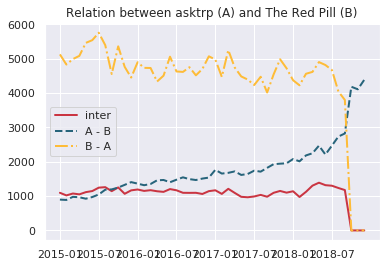

In [63]:
plot_comparasion(df1, df2, 'asktrp', 'The Red Pill')

## Comparing Groups of Subreddits

In [10]:
def create_df(subreddits, timeline):
    for reddit in subreddits:
        temp_df = pd.read_csv(f'./data/reddit/cm/{reddit}_comments.csv')
        temp_df = complement_df(temp_df, reddit, timeline)
        if reddit == subreddits[0]:
            df = temp_df
        else:
            df = df.append(temp_df, ignore_index=True)
    return df

### Mens Rights:

In [66]:
MR_subreddits = ['LadyMRAs', 'FeMRADebates', 'againstmensrights', 'Masculism', 'MensRants',
                 'FeMRA', 'MRActivism', 'MensRightsLaw', 'MRRef']

### Braincels:

In [67]:
Braincels_subreddits = ['askanincel', 'BlackPillScience', 'IncelsWithoutHate', 'Braincels']

### Red Pill:

In [13]:
RedPill_subreddits = ['RedPillParenting', 'TRPOffTopic', 'GEOTRP', 'thankTRP', 'redpillbooks',
                      'becomeaman', 'exredpill', 'RedPillWomen', 'TheBluePill', 'asktrp', 'TheRedPill']

In [11]:
other_months = ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
        '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
        '2017-10', '2017-11', '2017-12']

### Comparing by Month:

In [70]:
MR_df = create_df(MR_subreddits, months)

In [71]:
Braincels_df = create_df(Braincels_subreddits, months)

In [14]:
Red_Pill_df = create_df(RedPill_subreddits, other_months)

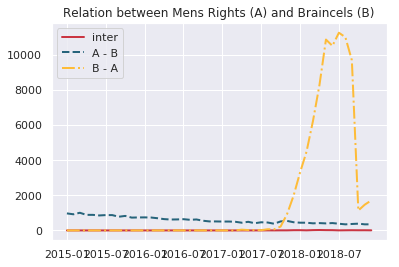

In [73]:
plot_comparasion(MR_df, Braincels_df, 'Mens Rights', 'Braincels', timeline=months)

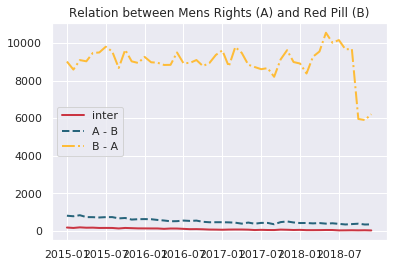

In [74]:
plot_comparasion(MR_df, Red_Pill_df, 'Mens Rights', 'Red Pill', timeline=months)

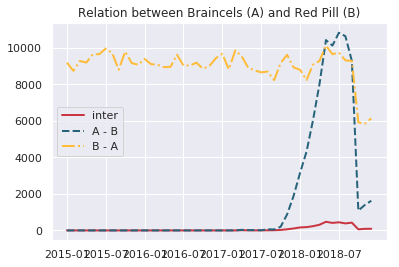

In [75]:
plot_comparasion(Braincels_df, Red_Pill_df, 'Braincels', 'Red Pill', timeline=months)

### MGTOW and Others

In [15]:
MGTOW_df = create_df(['MGTOW'], other_months)

In [16]:
reddits = ['Red Pill']

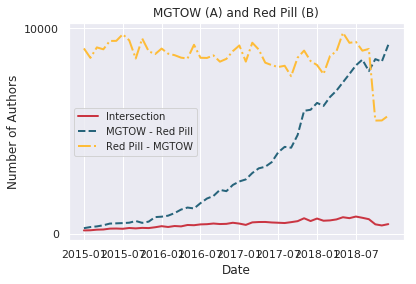

In [20]:
c = 0

plt.locator_params(axis='y', nbins=2)
df = Red_Pill_df
inter, A_B, B_A = comparing_subreddits(MGTOW_df, df, months)
sns.set_context("notebook")
plt.plot(months, inter, "-", color="#ca3542", linewidth=2)
plt.plot(months, A_B, "--", color="#27647B", linewidth=2)
plt.plot(months, B_A, "-.", color="#febc38", linewidth=2)
plt.xticks([months[i] for i in range(0,len(months), 6)])
plt.legend(['Intersection', f'MGTOW - {reddits[c]}', f'{reddits[c]} - MGTOW'], fontsize=10)
plt.title(f"MGTOW (A) and {reddits[c]} (B)")
plt.xlabel("Date")
plt.ylabel("Number of Authors")

c+=1

### Comparing by years:

In [20]:
years=['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

In [21]:
MR_df = create_df(MR_subreddits, years)

In [22]:
Braincels_df = create_df(Braincels_subreddits, years)

In [23]:
Red_Pill_df = create_df(RedPill_subreddits, years)

#### Mens Rights - Braincels

[0, 0, 0, 0, 0, 38, 179, 28]
[1444, 3053, 5013, 3662, 2481, 2059, 1661, 781]
[0, 0, 0, 0, 0, 2923, 48392, 9414]


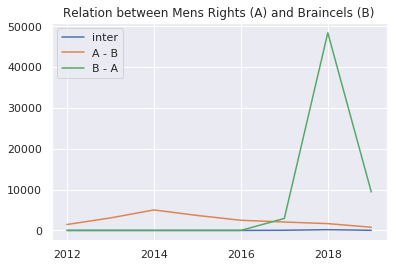

In [24]:
plot_comparasion(MR_df, Braincels_df, 'Mens Rights', 'Braincels')

#### Mens Rights - Red Pill

[8, 760, 1408, 1086, 752, 493, 342, 69]
[1436, 2293, 3605, 2576, 1729, 1604, 1498, 740]
[72, 11513, 33552, 41387, 43644, 48192, 46757, 11668]


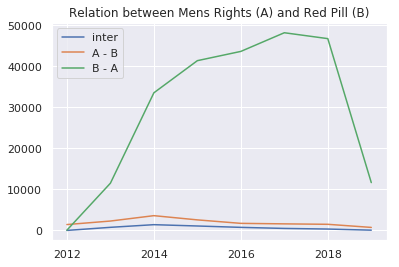

In [25]:
plot_comparasion(MR_df, Red_Pill_df, 'Mens Rights', 'Red Pill')

#### Braincels - Red Pill

[0, 0, 0, 0, 0, 412, 3577, 471]
[0, 0, 0, 0, 0, 2549, 44994, 8971]
[80, 12273, 34960, 42473, 44396, 48273, 43522, 11266]


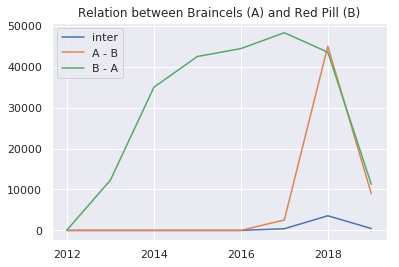

In [26]:
plot_comparasion(Braincels_df, Red_Pill_df, 'Braincels', 'Red Pill')